In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import uproot

In [2]:
tab_config = "O2hfcandb0config"
tab_mcrecreddppi = "O2hfmcrecreddppi"
tab_red3prong = "O2hfred3prong"
tab_red3prongml = "O2hfred3prongml_001"  # Empty
tab_red3prongscov = "O2hfred3prongscov"
tab_redb0softpi = "O2hfredb0softpi"
tab_redcollextra = "O2hfredcollextra"
tab_redcollision = "O2hfredcollision"
tab_redtrackbase = "O2hfredtrackbase"
tab_redtrackcov = "O2hfredtrackcov"
tab_redtrackpid = "O2hfredtrackpid"
tab_mcgen = "O2hfmcgenredb0"

Loading: DF_2387899194678550/O2hfredtrackpid;1
Total rows: 201
Columns: ['fHasTPC', 'fHasTOF', 'fTPCNSigmaPi', 'fTOFNSigmaPi']
Plotting fTPCNSigmaPi
Plotting fTOFNSigmaPi


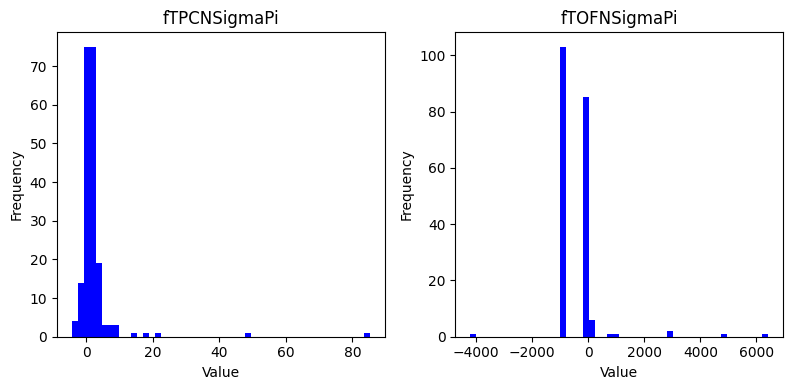

In [3]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File and pattern setup
file_path = 'Tree.root'
pattern = 'O2hfredtrackpid'

# Load matching trees
dfs = []
with uproot.open(file_path) as f:
    for key in f.keys():
        if pattern in key:
            print(f"Loading: {key}")
            df = f[key].arrays(library='pd')
            dfs.append(df)

# Concatenate all DataFrames
if not dfs:
    raise RuntimeError(f"No trees matching '{pattern}' were found.")

full_df = pd.concat(dfs, ignore_index=True)
print(f"Total rows: {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

# Filter to valid numeric columns
valid_columns = [
    col for col in full_df.columns
    if np.issubdtype(full_df[col].dtype, np.number) and np.isfinite(full_df[col]).any()
]

# Prepare layout
n_columns = len(valid_columns)
n_rows = (n_columns + 3) // 4  # 4 plots per row
fig, axes = plt.subplots(n_rows, 4, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Plot each valid column
for i, col in enumerate(valid_columns):
    print(f"Plotting {col}")
    data = full_df[col].dropna()
    axes[i].hist(data, bins=50, color='blue')
    axes[i].set_title(col)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any unused axes
for j in range(n_columns, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parentFiles;1']
DF_2387899194678550/O2hfredtrackcov;1
len(full_df): 201
Columns: ['fCYY', 'fCZY', 'fCZZ', 'fCSnpY', 'fCSnpZ', 'fCSnpSnp', 'fCTglY', 'fCTglZ', 'fCTglSnp', 'fCTglTgl', 'fC1PtY', 'fC1PtZ', 'fC1PtSnp', 'fC1PtTgl', 'fC1Pt21Pt2']
Plotting fCYY
Plotting fCZY
Plotting fCZZ
Plotting fCSnpY
Plotting fCSnpZ


/tmp/ipykernel_3066426/358649453.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fCSnpSnp
Plotting fCTglY
Plotting fCTglZ
Plotting fCTglSnp
Plotting fCTglTgl
Plotting fC1PtY
Plotting fC1PtZ
Plotting fC1PtSnp
Plotting fC1PtTgl
Plotting fC1Pt21Pt2


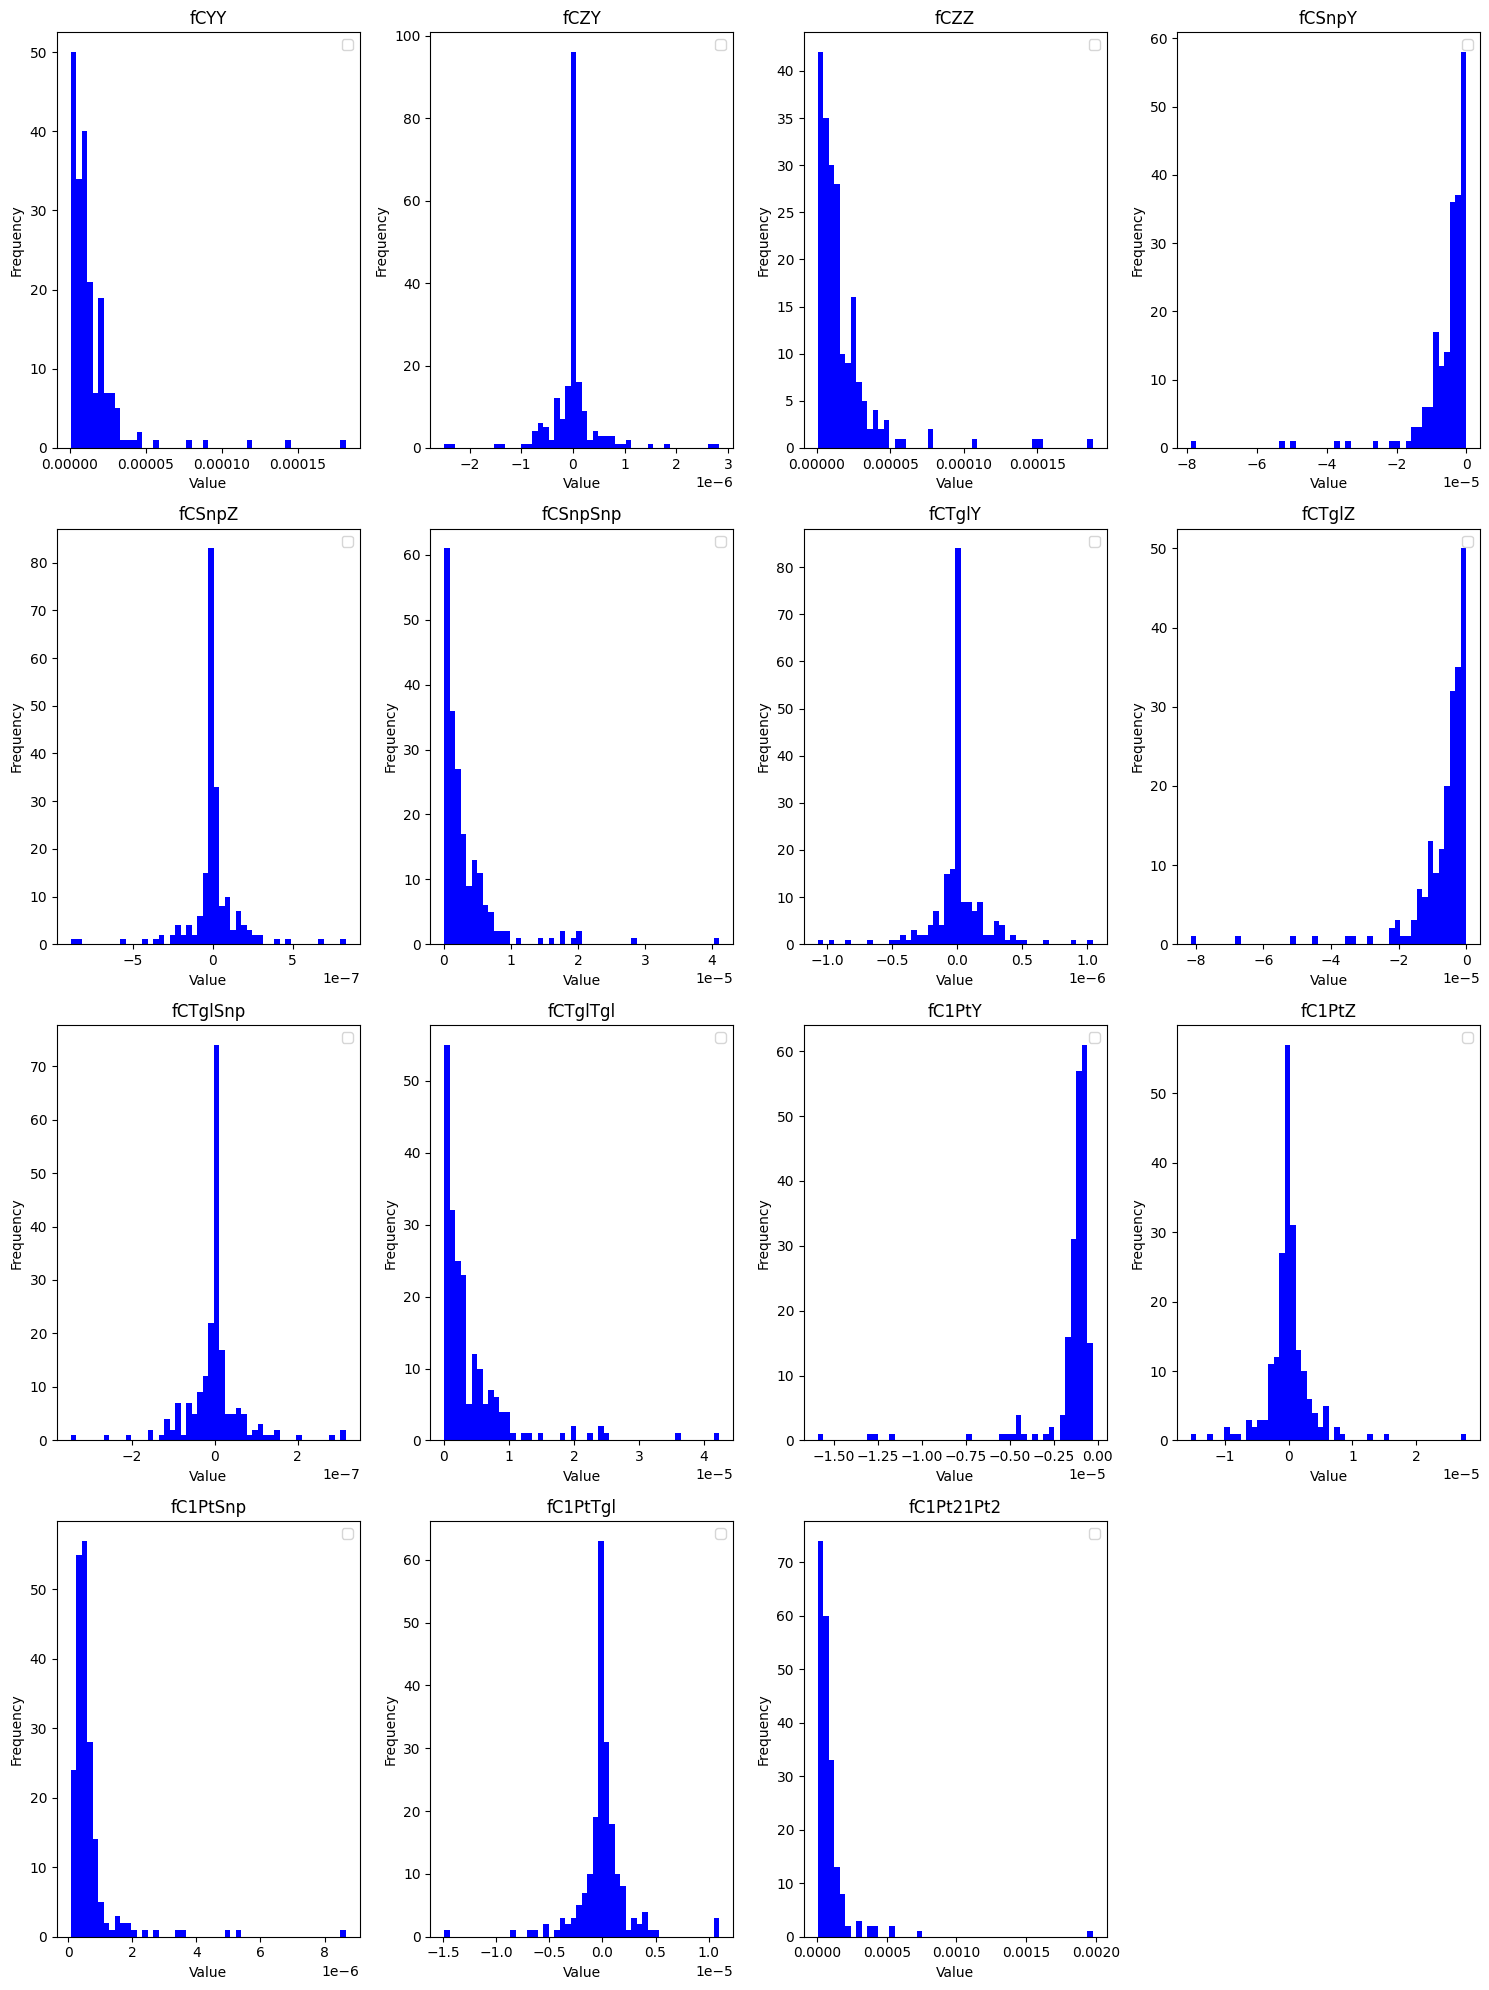

In [4]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfredtrackcov' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parentFiles;1']
DF_2387899194678550/O2hfredtrackbase;1
len(full_df): 201
Columns: ['fTrackId', 'fIndexHfRedCollisions', 'fX', 'fAlpha', 'fY', 'fZ', 'fSnp', 'fTgl', 'fSigned1Pt', 'fItsNCls', 'fTpcNClsCrossedRows', 'fTpcChi2NCl']
Plotting fTrackId
Plotting fIndexHfRedCollisions
Plotting fX
Plotting fAlpha
Plotting fY
Plotting fZ


/tmp/ipykernel_3066426/958114489.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fSnp
Plotting fTgl
Plotting fSigned1Pt
Plotting fItsNCls
Plotting fTpcNClsCrossedRows
Plotting fTpcChi2NCl


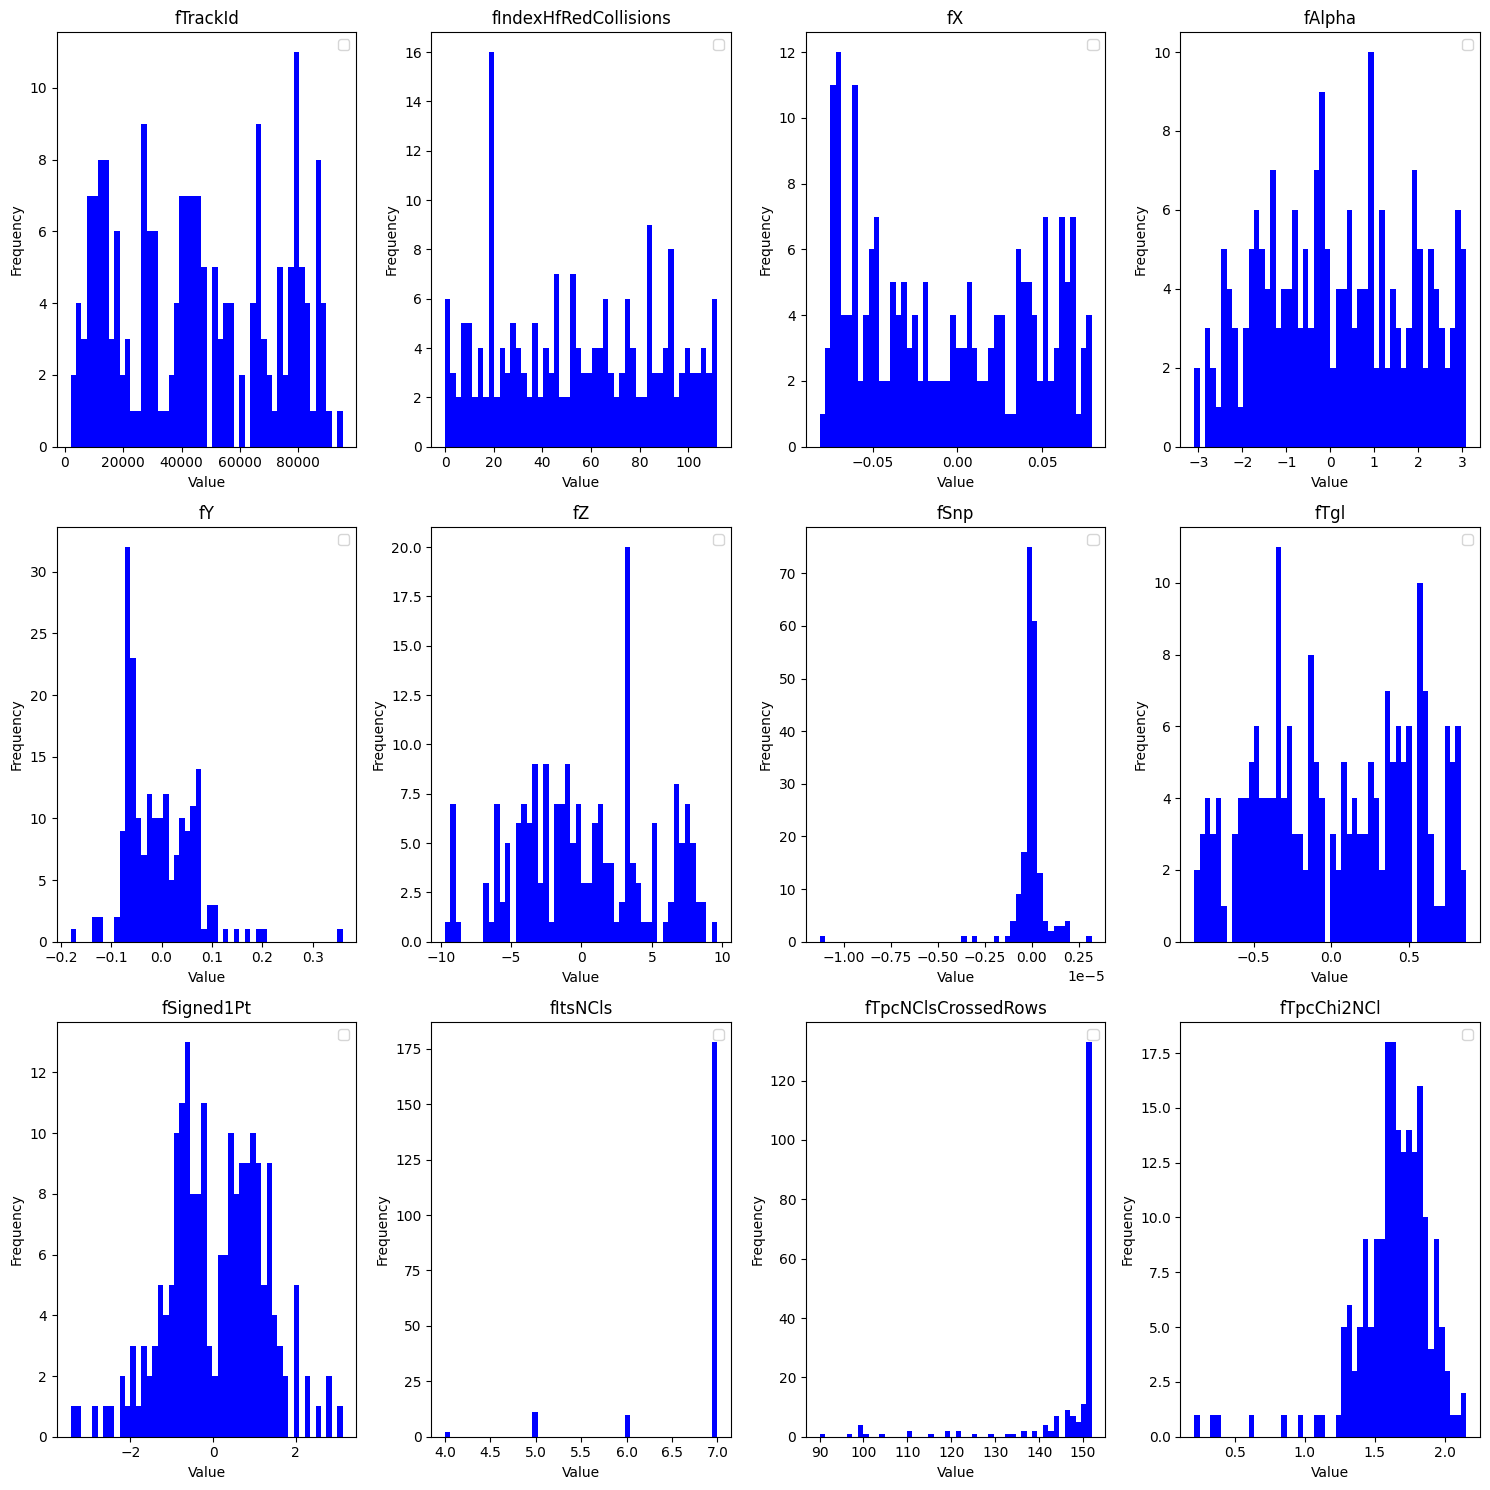

In [5]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfredtrackbase' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parentFiles;1']
DF_2387899194678550/O2hfredcollision;1
len(full_df): 113
Columns: ['fPosX', 'fPosY', 'fPosZ', 'fNumContrib', 'fHfCollisionRejectionMap', 'fBz']
Plotting fPosX
Plotting fPosY
Plotting fPosZ
Plotting fNumContrib
Plotting fHfCollisionRejectionMap
Plotting fBz


/tmp/ipykernel_3066426/687397439.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


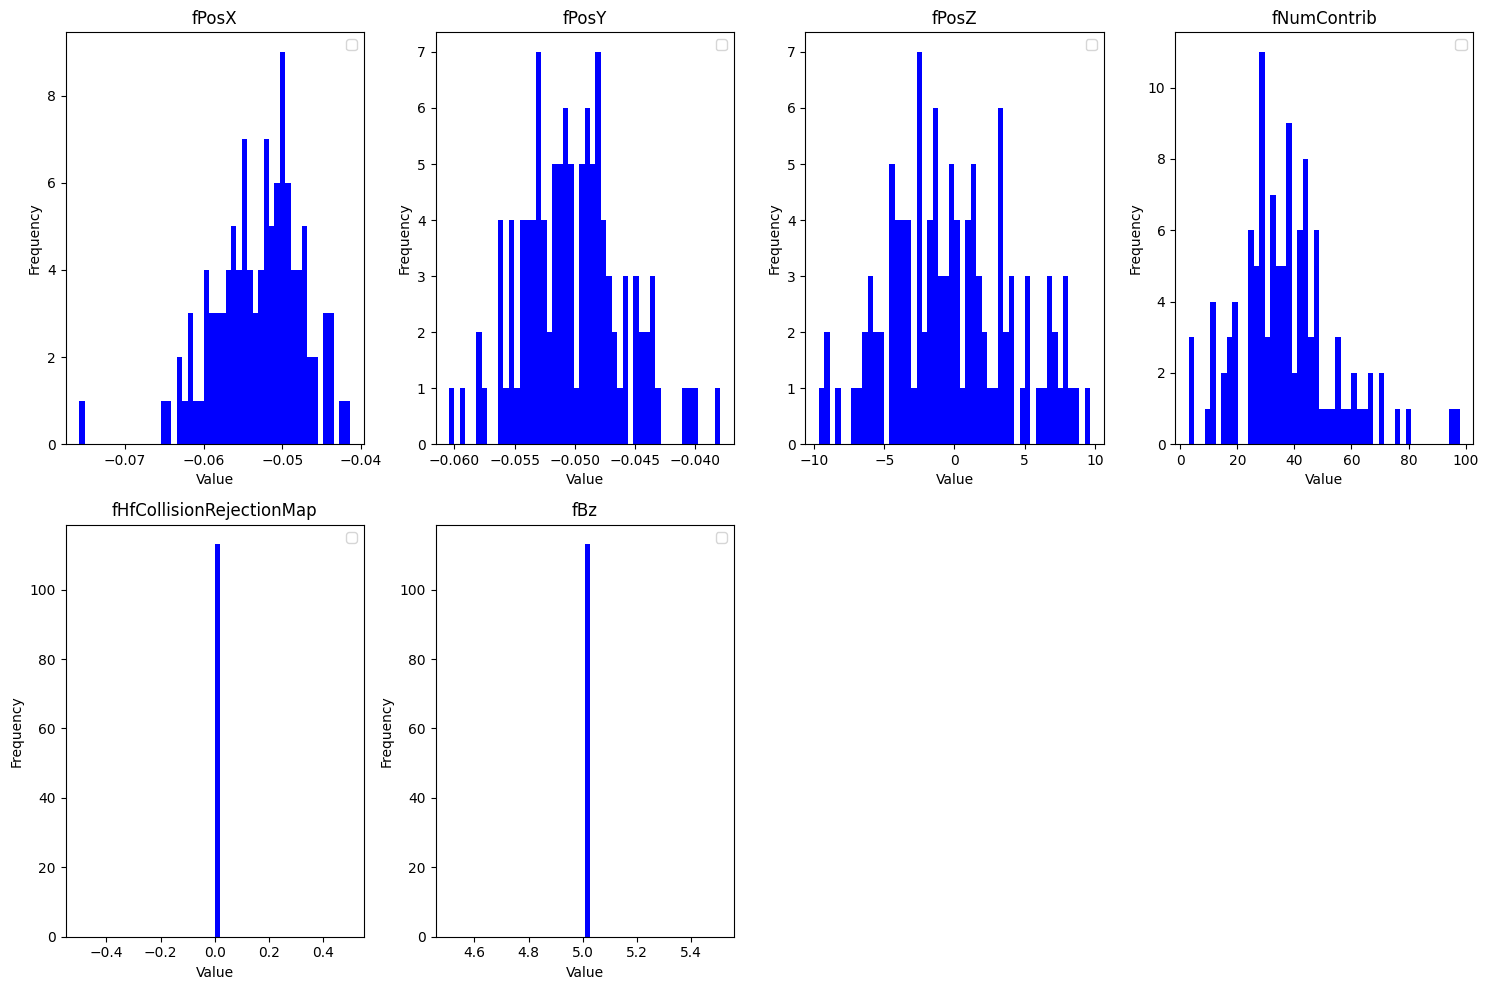

In [6]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfredcollision' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parentFiles;1']
DF_2387899194678550/O2hfredcollextra;1
len(full_df): 113
Columns: ['fCovXX', 'fCovXY', 'fCovYY', 'fCovXZ', 'fCovYZ', 'fCovZZ']
Plotting fCovXX
Plotting fCovXY
Plotting fCovYY
Plotting fCovXZ
Plotting fCovYZ
Plotting fCovZZ


/tmp/ipykernel_3066426/799176227.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


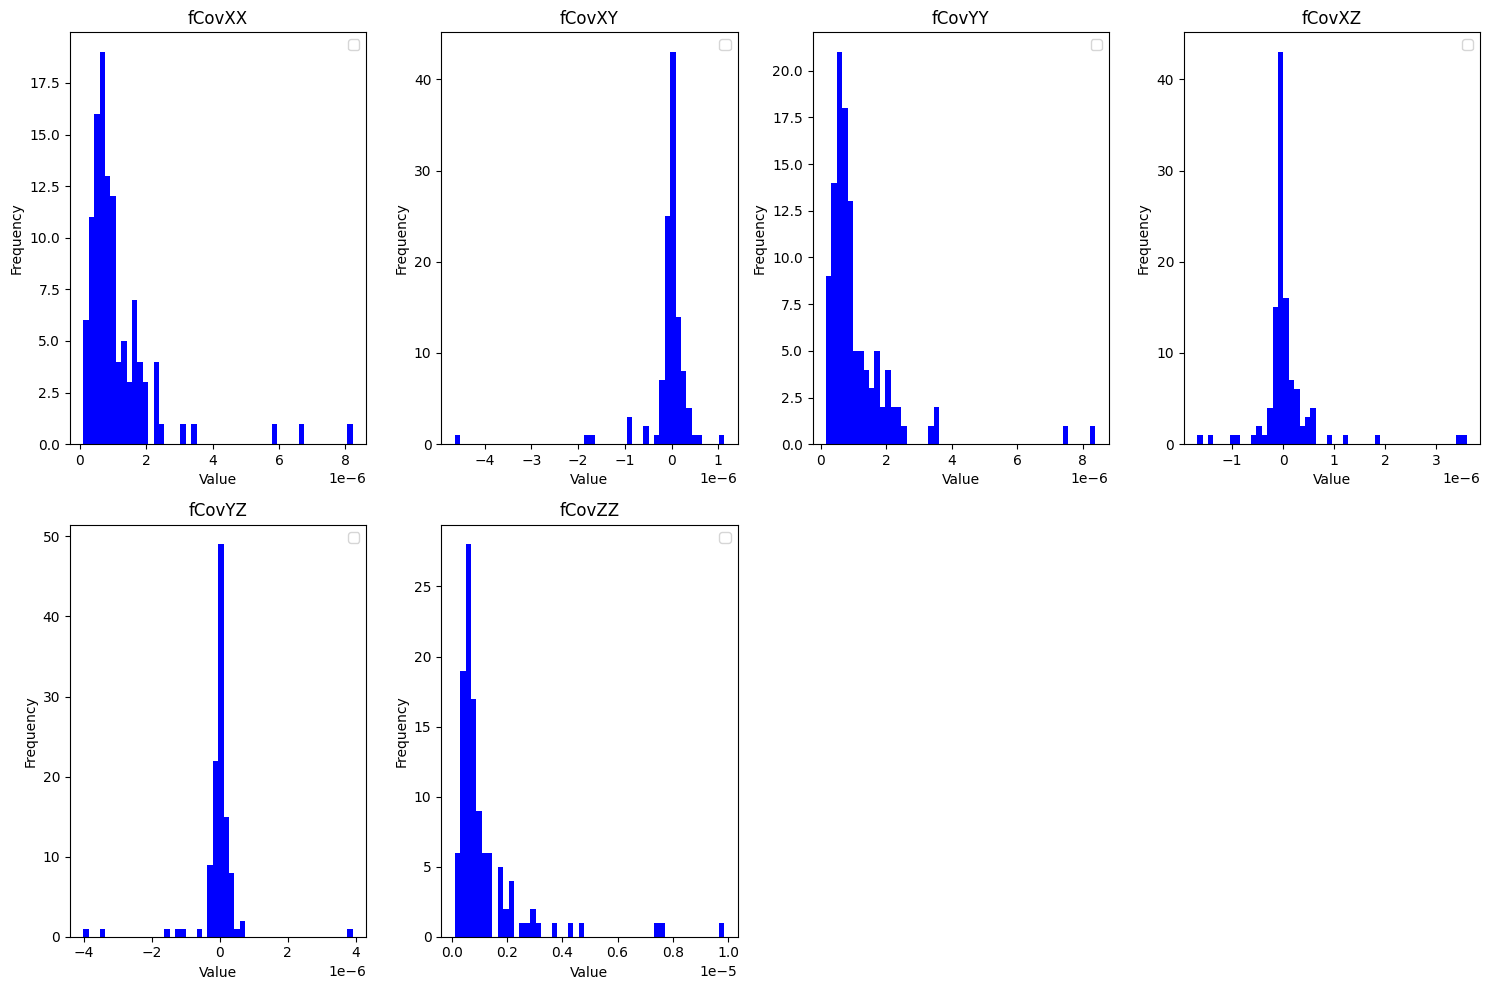

In [7]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfredcollextra' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parentFiles;1']
DF_2387899194678550/O2hfred3prongscov;1
len(full_df): 156
Columns: ['fCYY', 'fCZY', 'fCZZ', 'fCSnpY', 'fCSnpZ', 'fCSnpSnp', 'fCTglY', 'fCTglZ', 'fCTglSnp', 'fCTglTgl', 'fC1PtY', 'fC1PtZ', 'fC1PtSnp', 'fC1PtTgl', 'fC1Pt21Pt2']
Plotting fCYY
Plotting fCZY
Plotting fCZZ
Plotting fCSnpY
Plotting fCSnpZ


/tmp/ipykernel_3066426/1899350413.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


Plotting fCSnpSnp
Plotting fCTglY
Plotting fCTglZ
Plotting fCTglSnp
Plotting fCTglTgl
Plotting fC1PtY
Plotting fC1PtZ
Plotting fC1PtSnp
Plotting fC1PtTgl
Plotting fC1Pt21Pt2


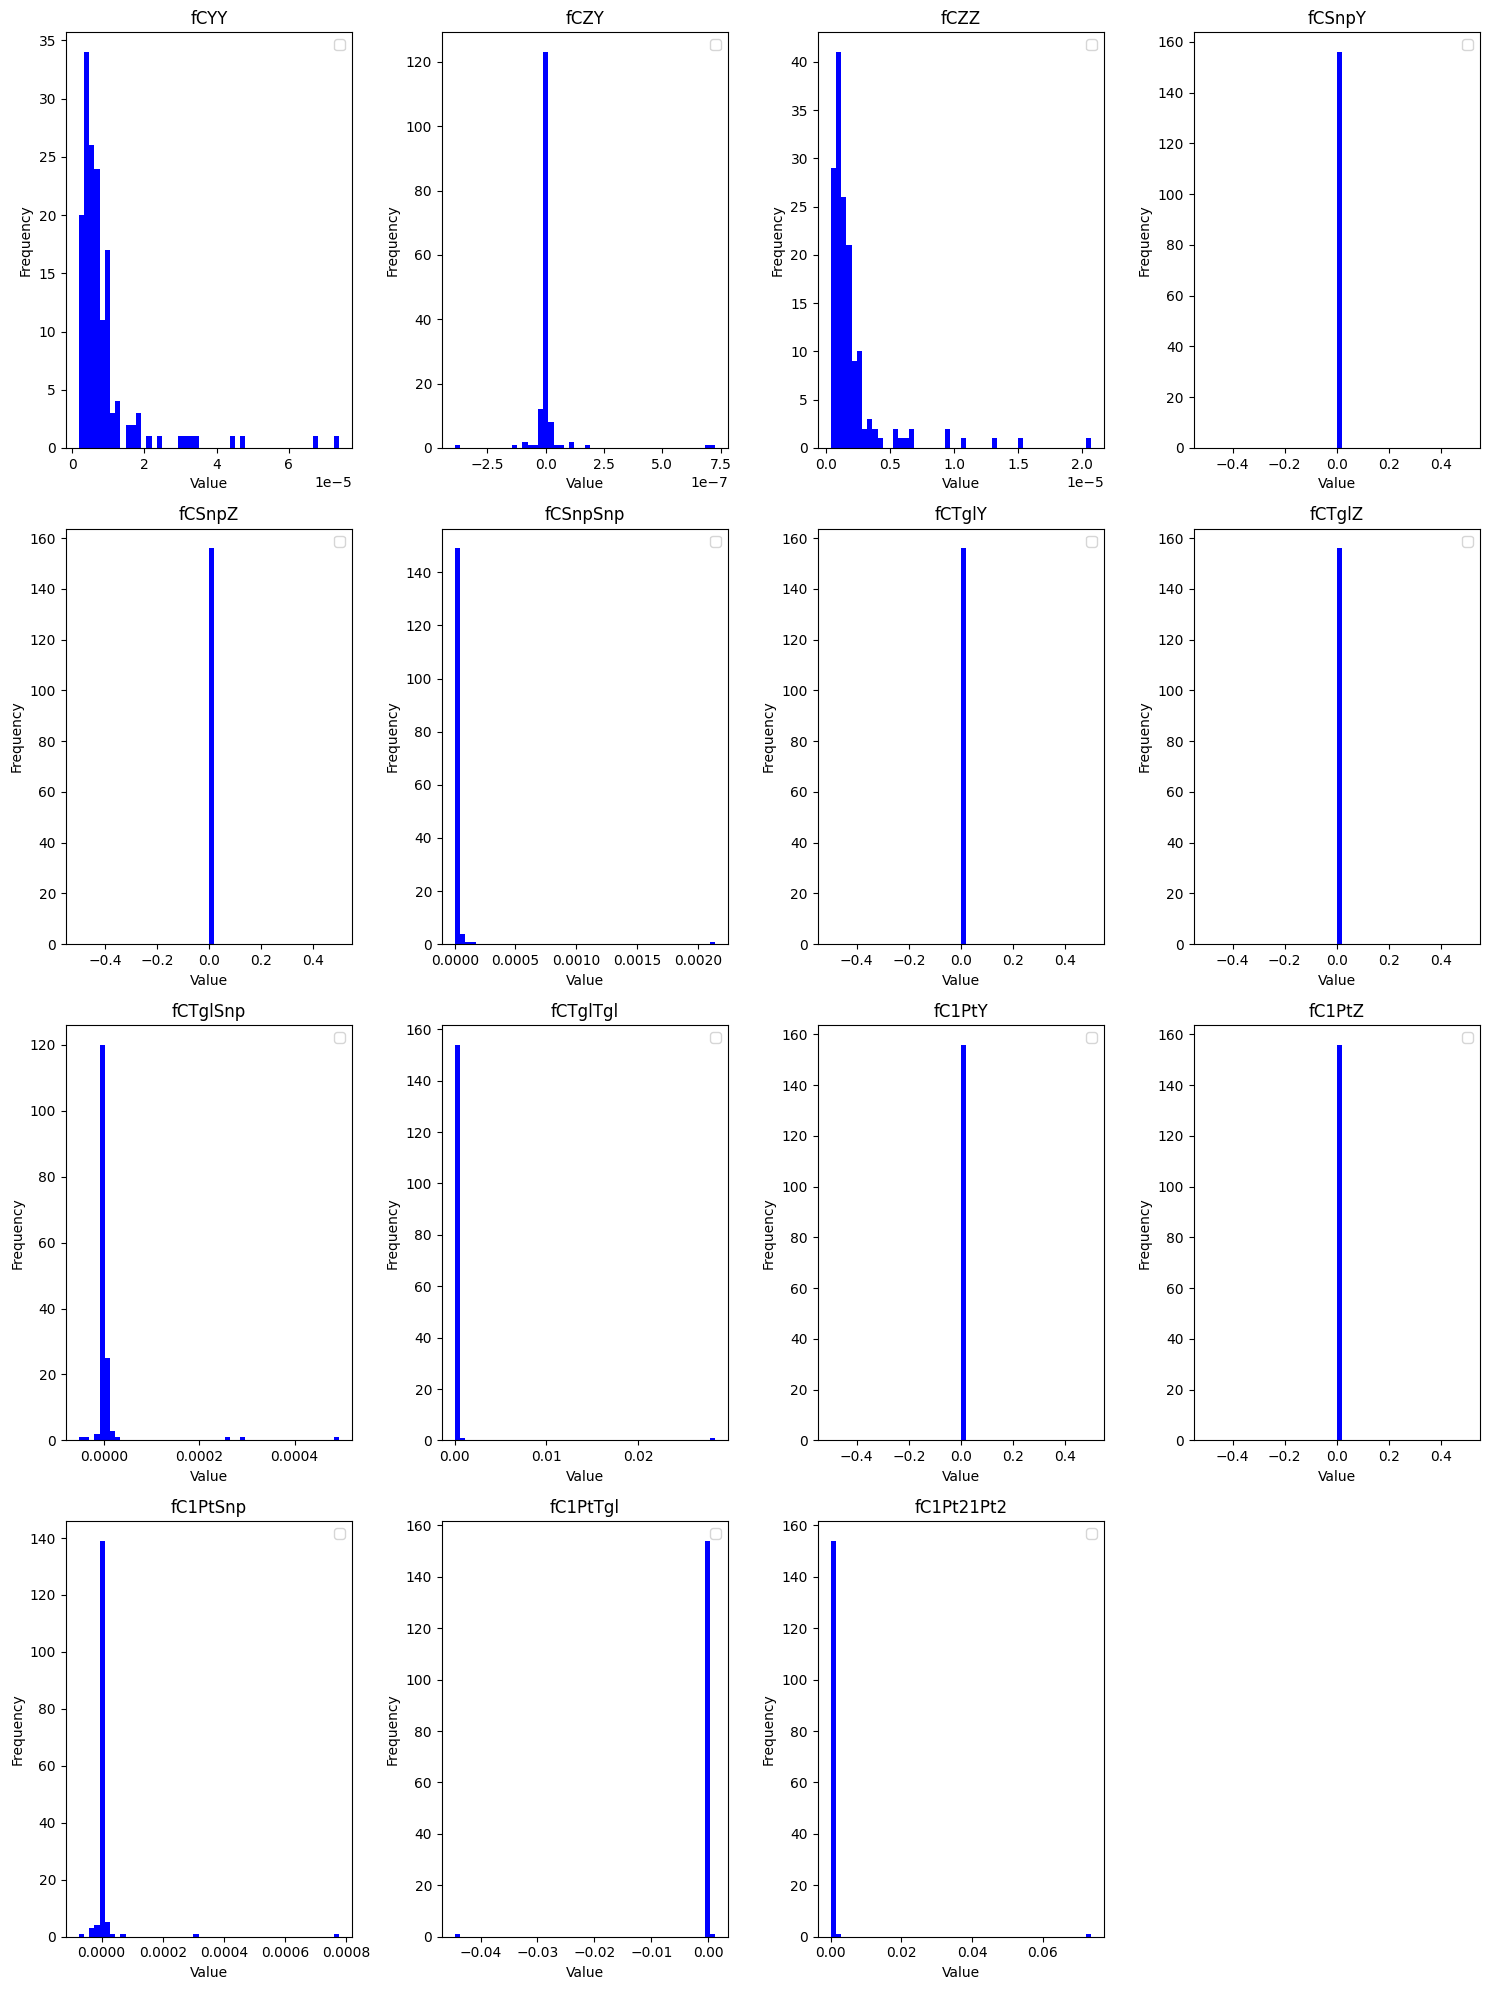

In [8]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfred3prongscov' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parentFiles;1']
DF_2387899194678550/O2hfred3prong;1
DF_2387899194678550/O2hfred3prongml_001;1
DF_2387899194678550/O2hfred3prongscov;1
len(full_df): 468
Columns: ['fProng0Id', 'fProng1Id', 'fProng2Id', 'fIndexHfRedCollisions', 'fX', 'fAlpha', 'fY', 'fZ', 'fSnp', 'fTgl', 'fSigned1Pt', 'fXSecondaryVertex', 'fYSecondaryVertex', 'fZSecondaryVertex', 'fInvMassHypo0', 'fInvMassHypo1', 'fPtProngMin', 'fAbsEtaProngMin', 'fItsNClsProngMin', 'fTpcNClsCrossedRowsProngMin', 'fTpcChi2NClProngMax', 'fMlScoreBkgMassHypo0', '

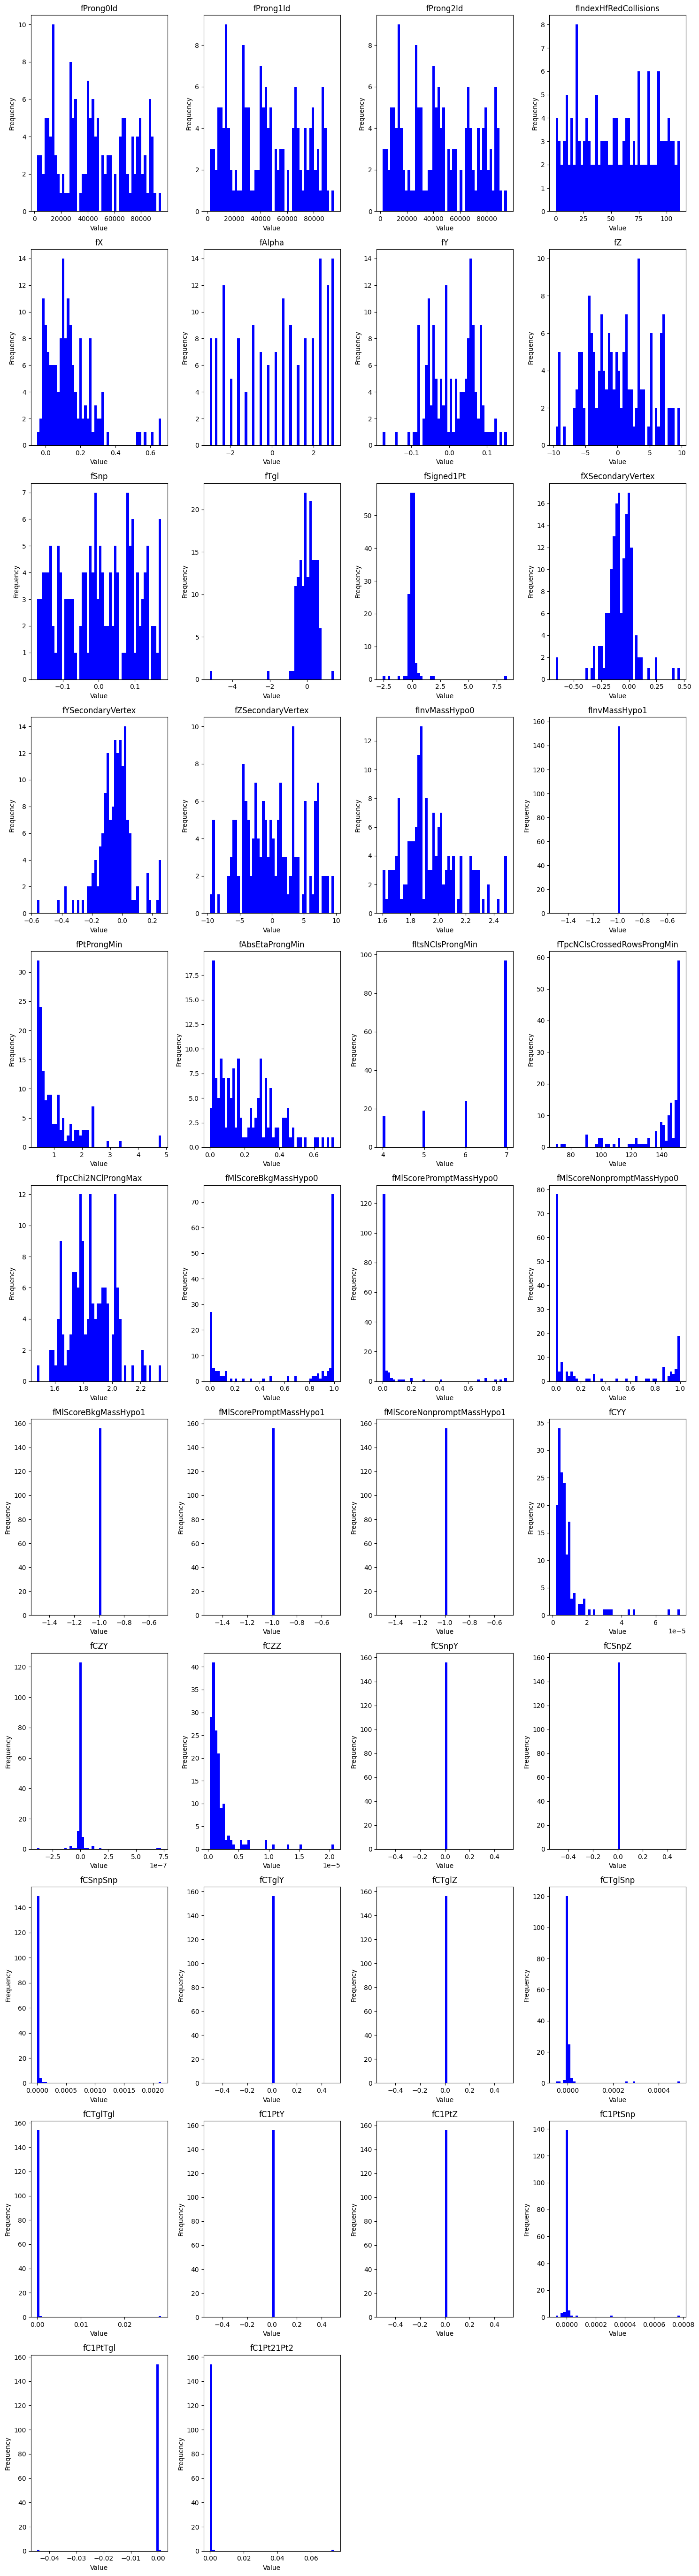

In [9]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfred3prong' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

import numpy as np
# Filter to numeric columns with at least one finite value
numeric_columns = [
    col for col in full_df.columns
    if np.issubdtype(full_df[col].dtype, np.number) and np.isfinite(full_df[col]).any()
]

n_columns = len(numeric_columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    print(f"Plotting {column}")
    data = full_df[column].dropna()
    axes[i].hist(data, bins=50, color='blue')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove unused axes
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


['DF_2387899194678550;1', 'DF_2387899194678550/O2hfcandb0config;1', 'DF_2387899194678550/O2hfmcgenredb0;1', 'DF_2387899194678550/O2hfmcrecreddppi;1', 'DF_2387899194678550/O2hfred3prong;1', 'DF_2387899194678550/O2hfred3prongml_001;1', 'DF_2387899194678550/O2hfred3prongscov;1', 'DF_2387899194678550/O2hfredcollextra;1', 'DF_2387899194678550/O2hfredcollision;1', 'DF_2387899194678550/O2hfredtrackbase;1', 'DF_2387899194678550/O2hfredtrackcov;1', 'DF_2387899194678550/O2hfredtrackpid;1', 'parentFiles;1']
DF_2387899194678550/O2hfcandb0config;1
len(full_df): 1
Columns: ['fMySelectionFlagD', 'fMyInvMassWindowDPi']
Plotting fMySelectionFlagD
Plotting fMyInvMassWindowDPi


/tmp/ipykernel_3066426/1967894679.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[i].legend()  # Add legend to the current axis


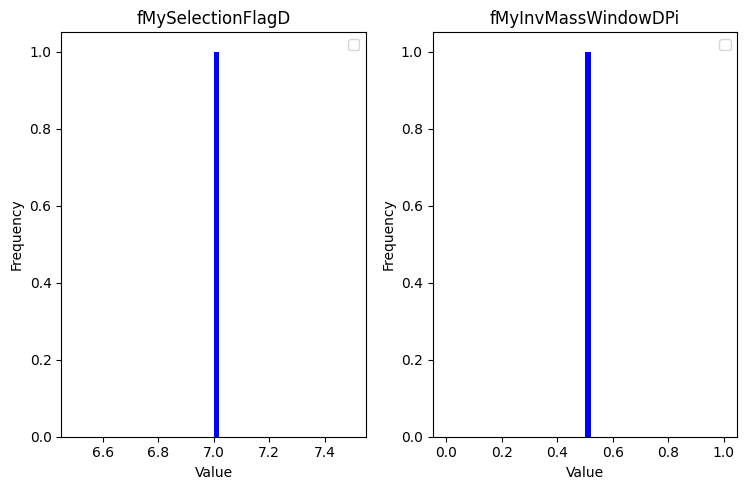

In [10]:
dfsData = []
dfsDataLite = []
with uproot.open('Tree.root') as f:
    print(f.keys())
    for iKey, key in enumerate(f.keys()):
        if 'O2hfcandb0config' in key:
            print(key)
            dfData = f[key].arrays(library='pd')
            dfsData.append(dfData)

full_df = pd.concat([df for df in dfsData], ignore_index=True)
print(f"len(full_df): {len(full_df)}")
print(f"Columns: {full_df.columns.tolist()}")

n_columns = len(full_df.columns)
n_rows = (n_columns // 4) + (1 if n_columns % 4 else 0)

fig, axes = plt.subplots(n_rows, 4, figsize=(15, 5 * n_rows))
axes = axes.flatten()
for i, column in enumerate(full_df.columns):
    print(f"Plotting {column}")
    axes[i].hist(full_df[column], bins=50, color='blue') #, density=True)
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    # axes[i].set_yscale('log')
    axes[i].legend()  # Add legend to the current axis

# Remove unused axes if any
for i in range(n_columns, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()